# Problem Statement

The head of HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a dataset that contains the data about the number of years of experience and the salary hike given accordingly. Build a Simple Linear Regression model with salary as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models

----------- ### -------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (15,15)

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.shape

(30, 2)

We have 30 rows and 2 columns

In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

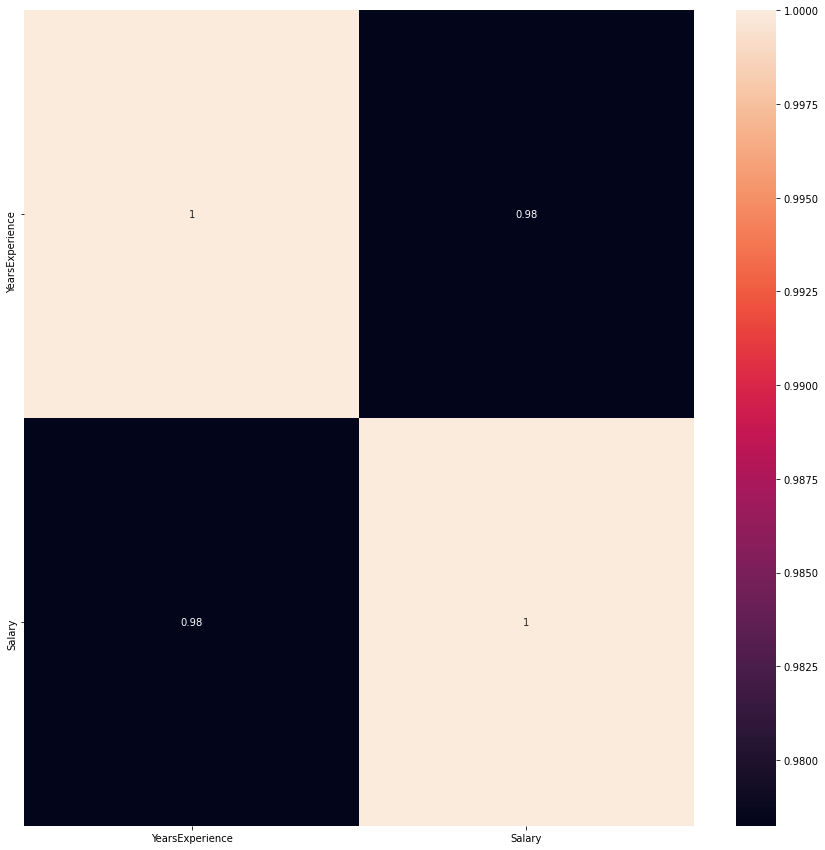

In [4]:
sns.heatmap(data.corr(), annot=True)

In [5]:
data.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


{'whiskers': [<matplotlib.lines.Line2D at 0x132ef802eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x132ef1835b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x132ef802b50>,
 'medians': [<matplotlib.lines.Line2D at 0x132ef183c70>,
 'fliers': [<matplotlib.lines.Line2D at 0x132ef183fd0>,
 'means': []}

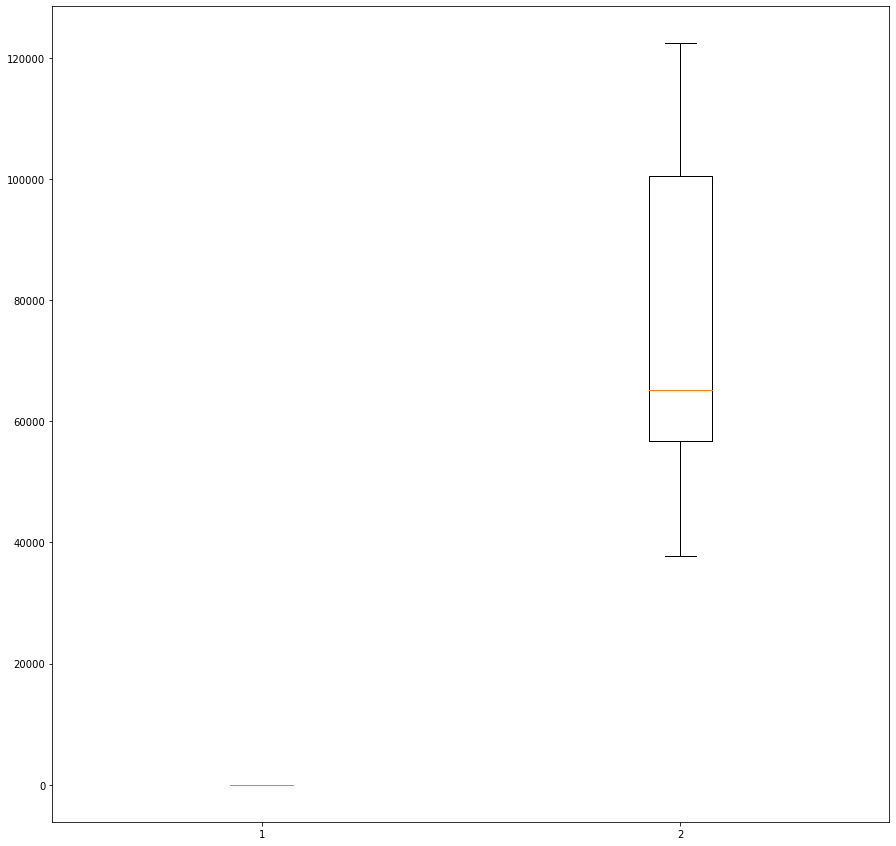

In [6]:
plt.boxplot(data)

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

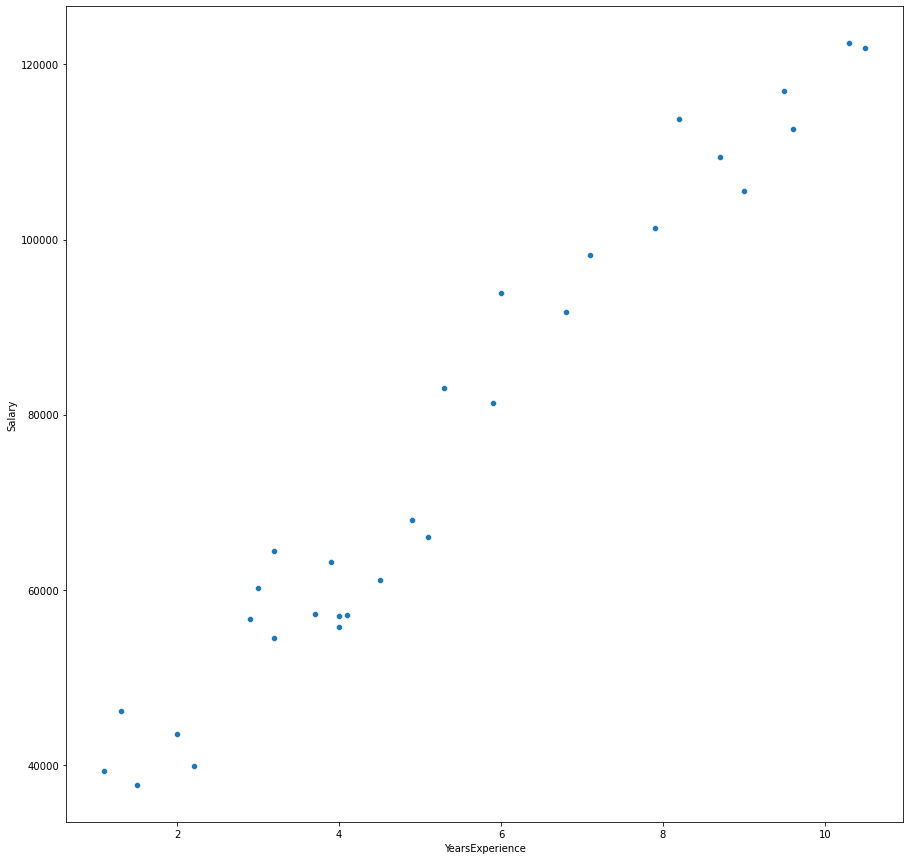

In [7]:
sns.scatterplot(data['YearsExperience'], data['Salary'])

Lets Build our models

In [8]:
import statsmodels.formula.api as smf

## Model 1 - Simple Linear Regression

In [9]:
model1 = smf.ols('Salary ~ YearsExperience', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        15:04:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
pred1 = model1.predict(pd.DataFrame(data['YearsExperience']))
pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

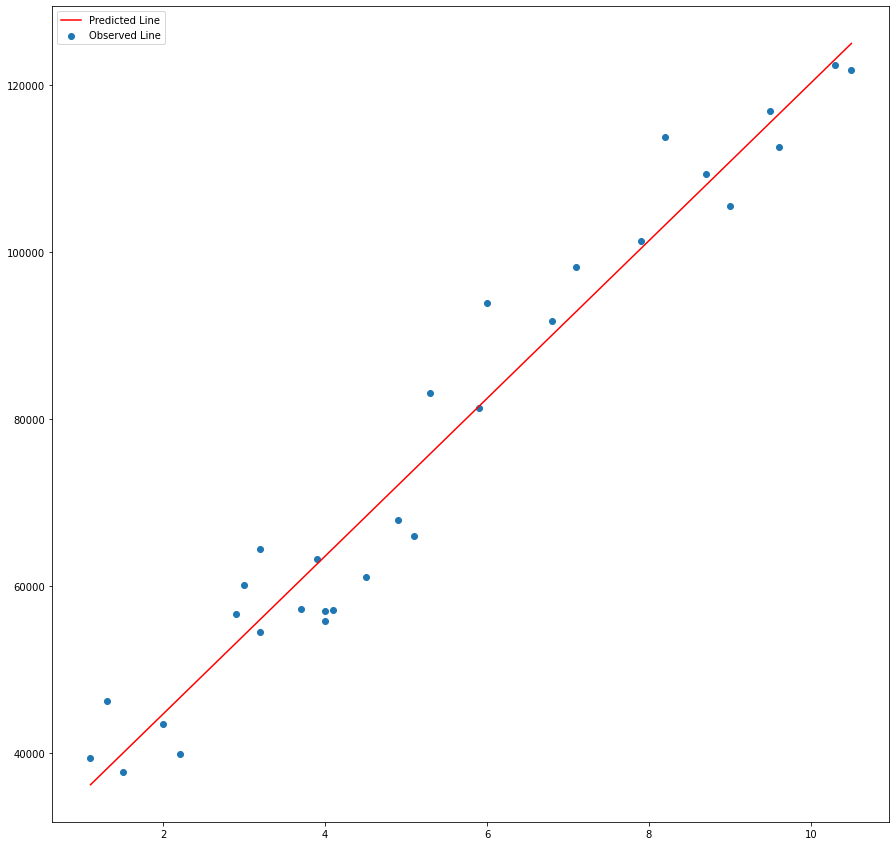

In [11]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.plot(data['YearsExperience'], pred1,"r")
plt.legend(['Predicted Line', 'Observed Line'])
plt.show()

In [12]:
# RMSE of Model1

res1 = data['Salary'] - pred1
res_sqrt1 = res1 * res1
mse1 = np.mean(res_sqrt1)
rmse = np.sqrt(mse1)
rmse

5592.043608760661

## Log Transformation

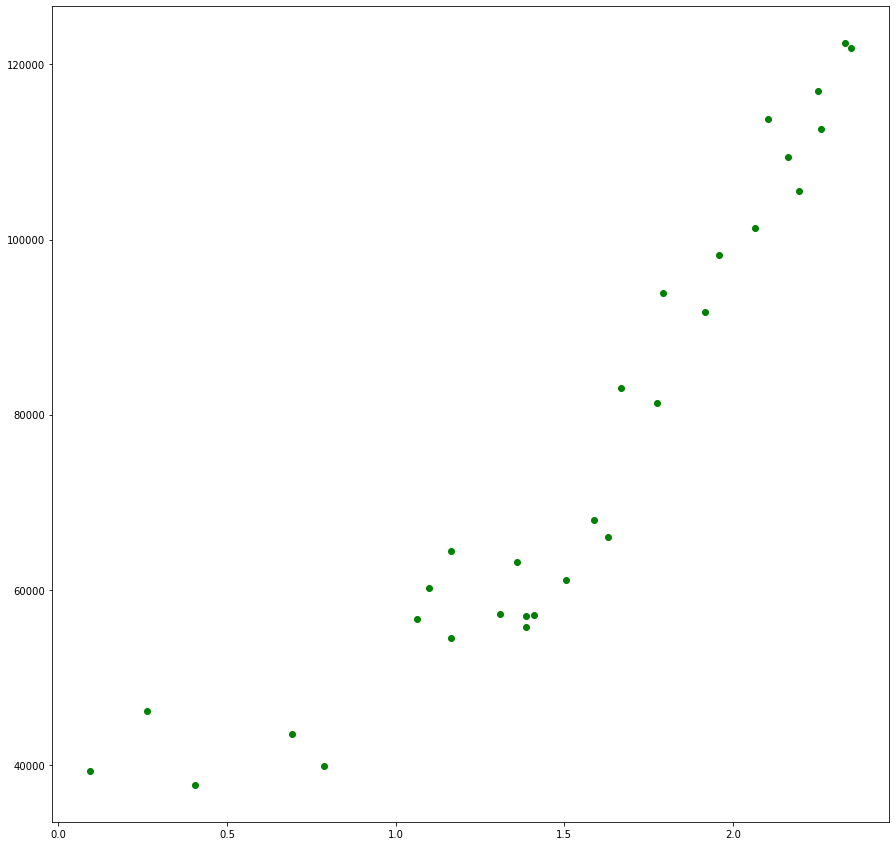

In [13]:
plt.scatter(x=np.log(data['YearsExperience']), y = data['Salary'], color='green')

In [14]:
np.corrcoef(np.log(data['YearsExperience']),data['Salary'])

array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

In [15]:
model2 = smf.ols('Salary ~ np.log(YearsExperience)', data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.25e-13
Time:                        15:07:53   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
pred2 = model2.predict(pd.DataFrame(data['YearsExperience']))

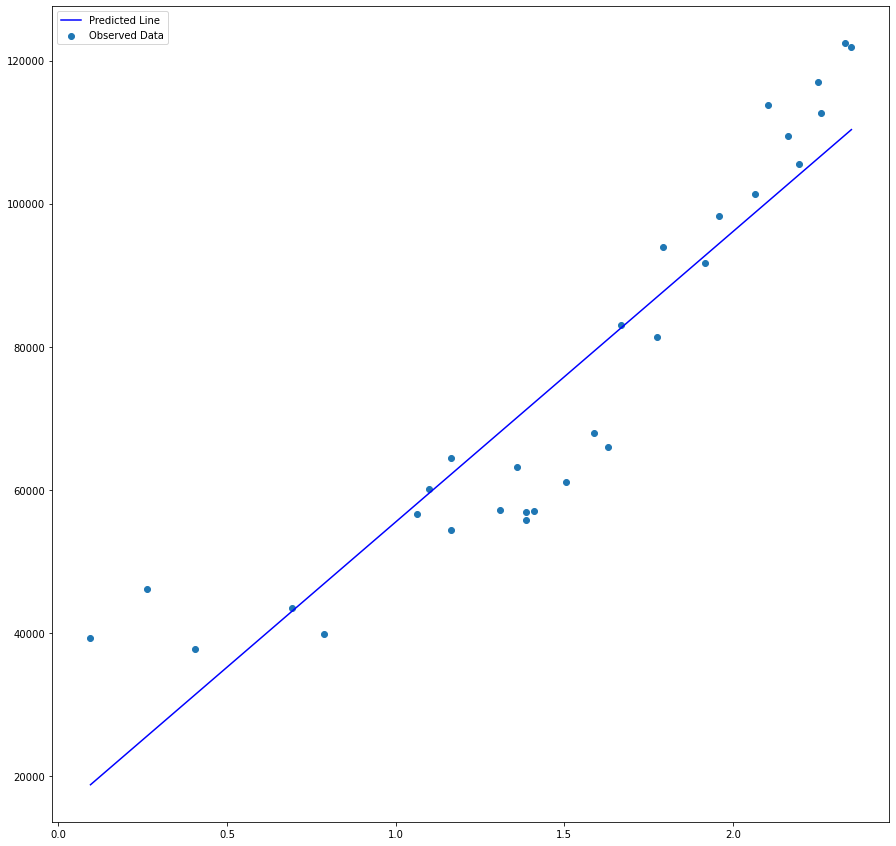

In [17]:
# Regression Line

plt.scatter(np.log(data['YearsExperience']), data['Salary'])
plt.plot(np.log(data['YearsExperience']), pred2, "b")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [18]:
# Error Calculation

res2 = data['Salary'] - pred2
res_sqrt2 = res2 * res2
mse2 = np.mean(res_sqrt2)
rmse2 = np.sqrt(mse2)
rmse2

10302.893706228308

## Expontential Transformation

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

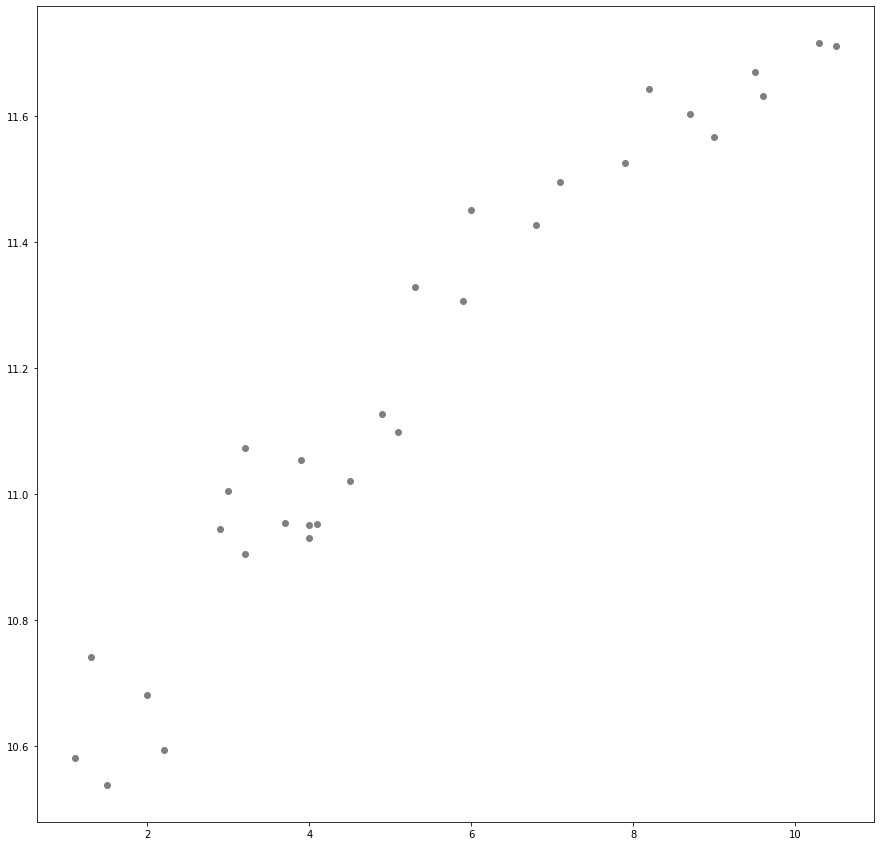

In [19]:
plt.scatter(x=data['YearsExperience'], y = np.log(data['Salary']), color = 'grey')
np.corrcoef(data['YearsExperience'],np.log(data['Salary']))

In [20]:
model3 = smf.ols('np.log(Salary) ~ YearsExperience', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           7.03e-18
Time:                        15:10:45   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred3 = model3.predict(pd.DataFrame(data['YearsExperience']))
pred3_at = np.exp(pred3)
pred3_at

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

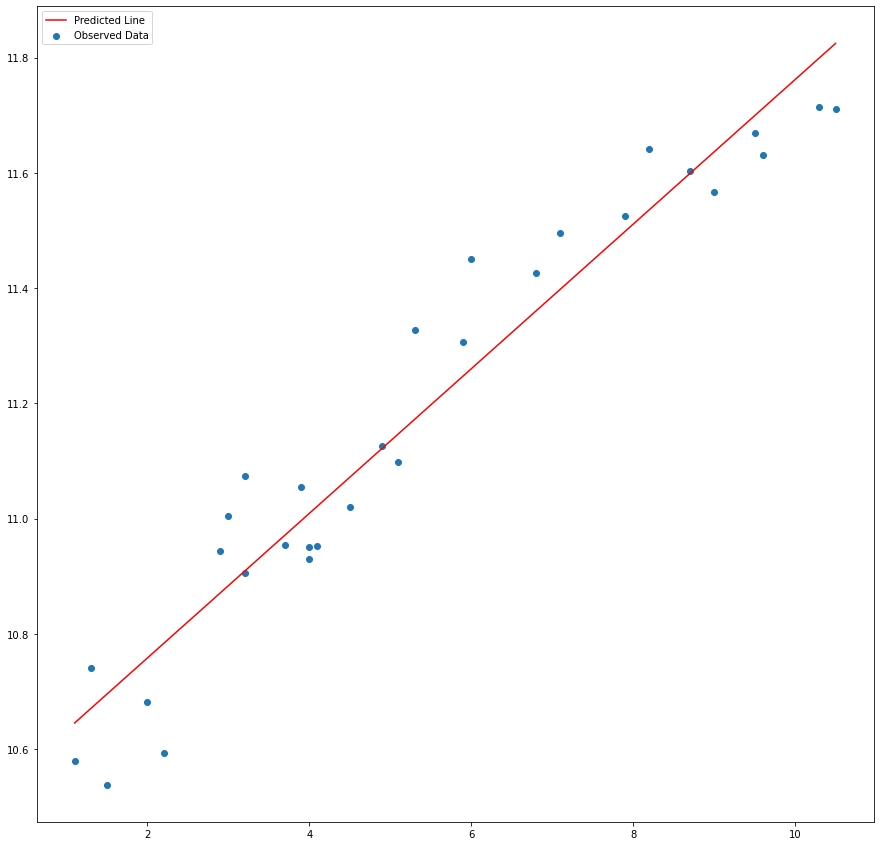

In [22]:
# Regression Line

plt.scatter(data['YearsExperience'],np.log(data['Salary']))
plt.plot(data['YearsExperience'], pred3, "r")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [23]:
# Error Calculation
res3 = data['Salary'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

7213.235076620129

## Polynomial Transformation

In [24]:
model4 = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience * YearsExperience)',data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.95e-18
Time:                        15:12:56   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience                          0.2024      0.027      7.601      0.000       0.148       0.257
I(YearsExperience * YearsExperience)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pred4 = model4.predict(pd.DataFrame(data['YearsExperience']))
pred4_at = np.exp(pred4)
pred4_at

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

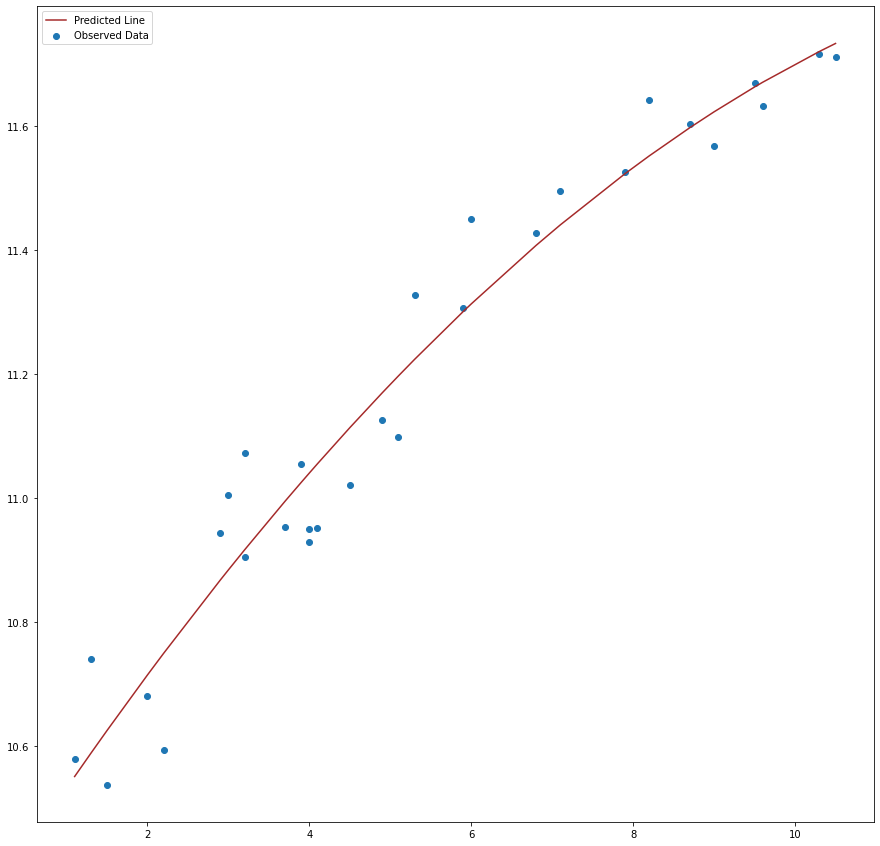

In [26]:
# Regression Line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
y = data.iloc[:,1].values

plt.scatter(data['YearsExperience'], np.log(data['Salary']))
plt.plot(X,pred4, color = 'brown')
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [27]:
# Error Calculation

res4 = data['Salary'] - pred4
res_sqrt4 = res4 * res4
mse4 = np.mean(res_sqrt4)
rmse4 = np.sqrt(mse4)
rmse4

80630.25757330738

In [28]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,5592.043609
1,Log model,10302.893706
2,Exp model,7213.235077
3,Poly model,80630.257573


As per table best model is SLR